# **<전북김제,전북진안 DLI 예측값과 실제값 비교>**




In [ ]:
import pandas as pd
from matplotlib import pyplot

In [ ]:
path = '/content/drive/MyDrive/ABCLABS/2021년_전북진안_DLI예측.xlsx'
data = pd.read_excel(path, sheet_name= '')


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = data.loc[:,['dates','pDLI','rDLI']]
df.head()

KeyError: ignored

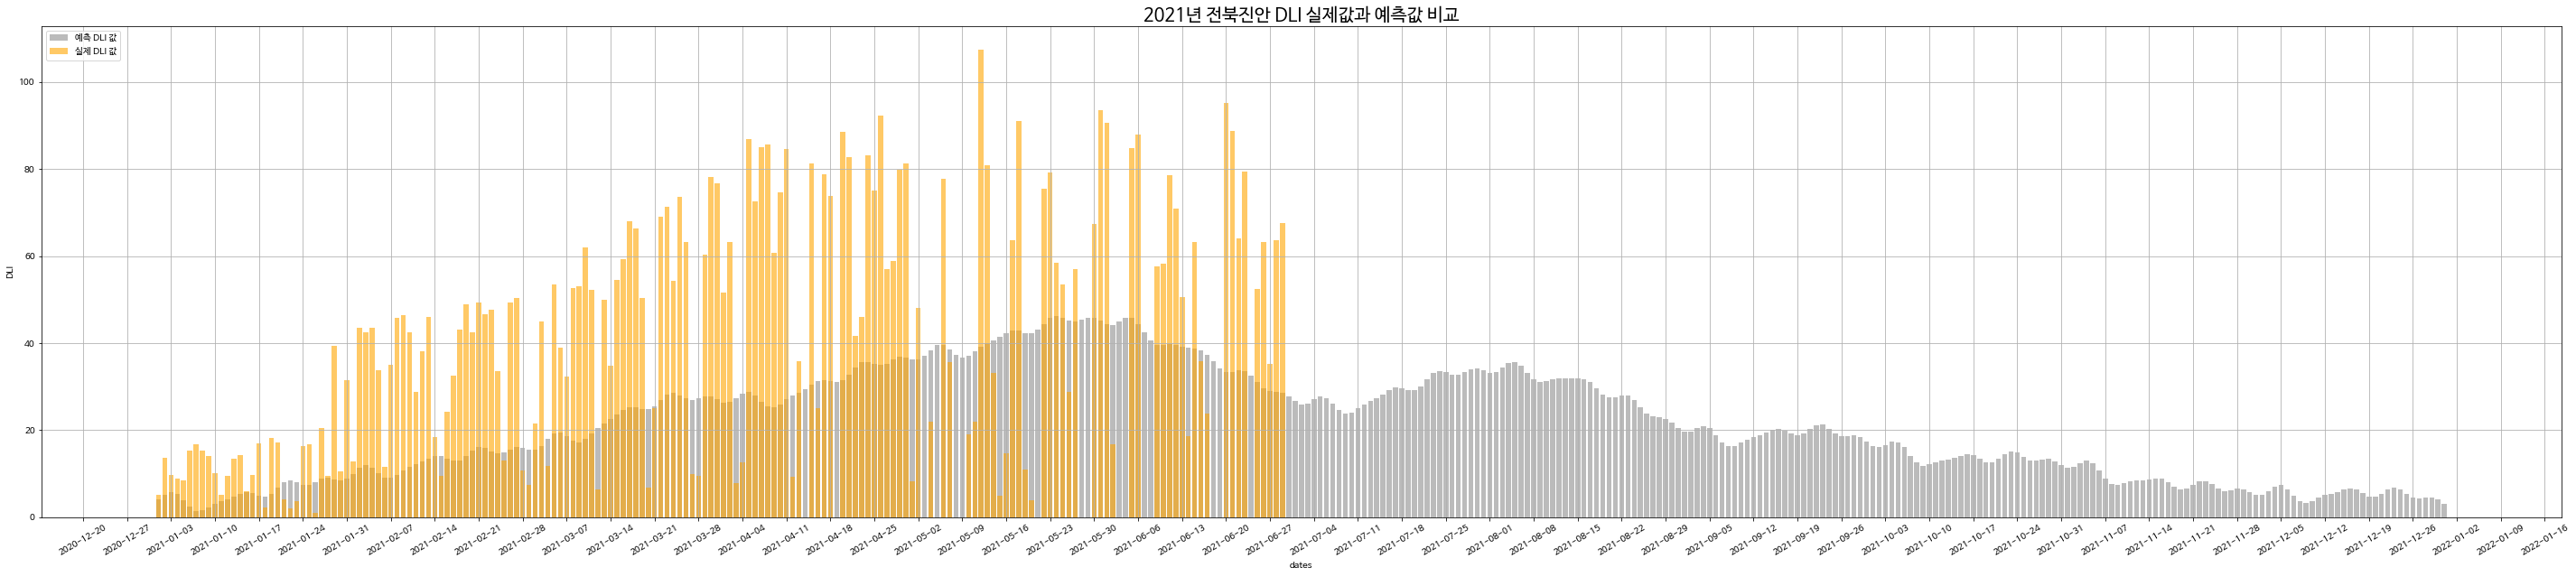

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(50,10))
plt.title('2021년 전북진안 DLI 실제값과 예측값 비교', size=20)
#plt.title('2021년 전북진안 DLI 실제값과 예측값 비교', size=20)

plt.bar(df['dates'], df['pDLI'],label='예측 DLI 값', color = '#AAAAAA', alpha = 0.8)
plt.bar(df['dates'], df['rDLI'],label='실제 DLI 값', color = 'orange',alpha = 0.6)
plt.xticks(rotation=30)

plt.xlabel('dates')
plt.ylabel('DLI')
plt.grid()
plt.legend(loc='upper left')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

In [ ]:
#실제값과 예측값의 차이
 
df2 = df
df2 = df2.fillna({'rDLI':df2['rDLI'].mean()})
df2['diff'] = abs(df['pDLI']-df['rDLI'])
df2.tail()

,dates,pDLI,rDLI,diff
360,2021-12-27,4.226737,39.081267,NaN
361,2021-12-28,4.507764,39.081267,NaN
362,2021-12-29,4.585072,39.081267,NaN
363,2021-12-30,4.016360,39.081267,NaN
364,2021-12-31,3.078989,39.081267,NaN


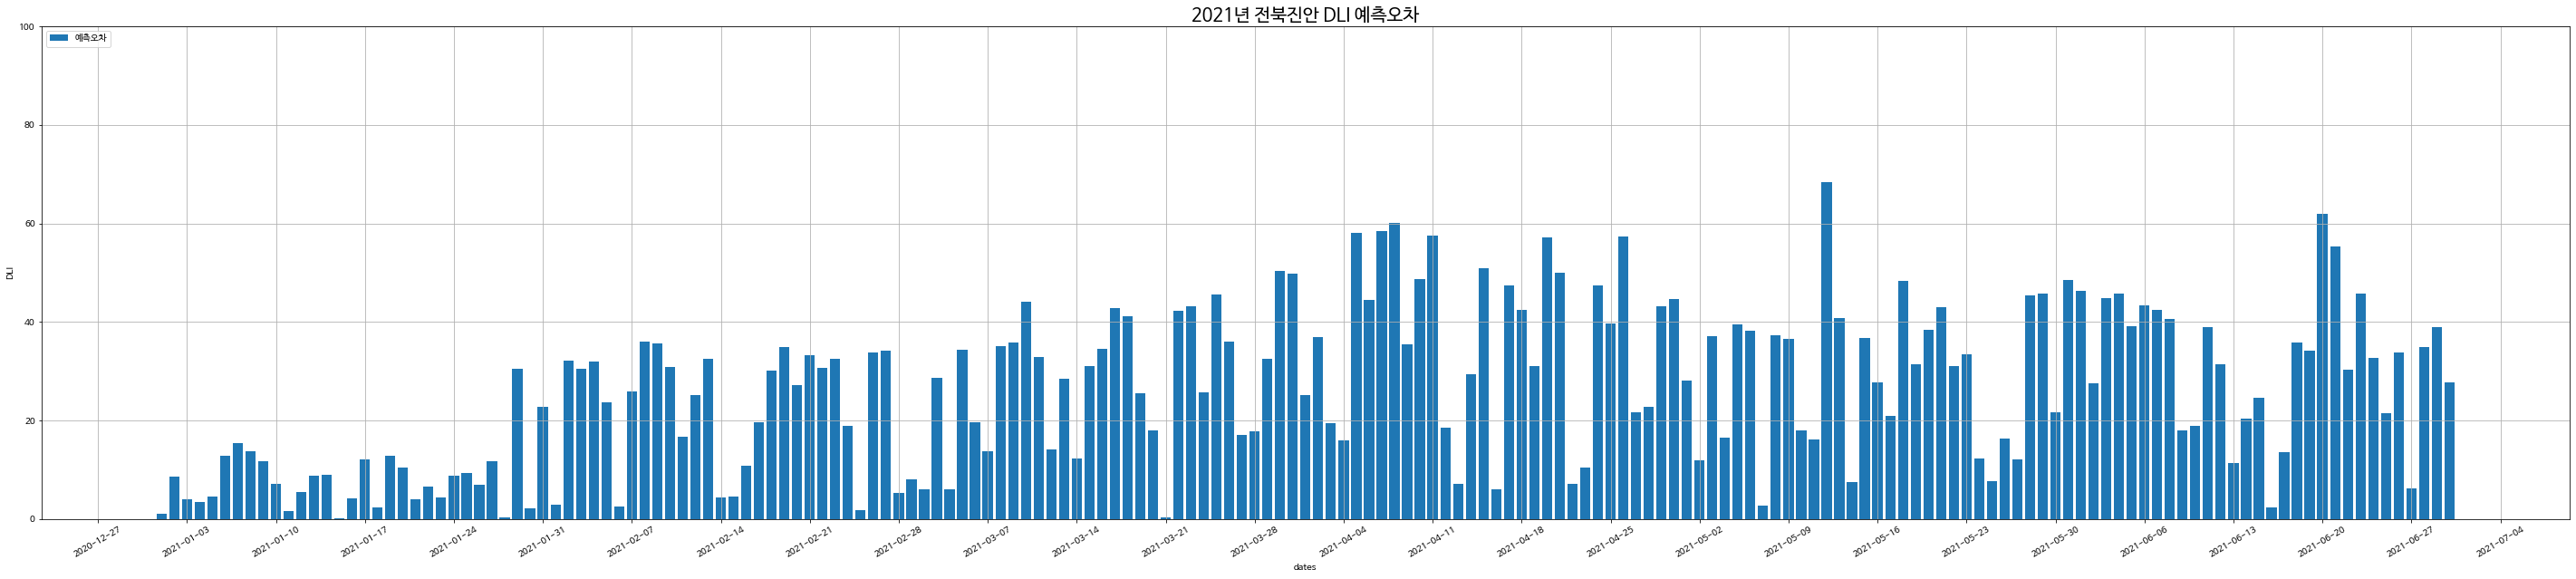

In [ ]:
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(50,10))
plt.title('2021년 전북진안 DLI 예측오차', size=20)

# plt.bar(df['dates'], df['pDLI'],label='예측 DLI 값', color = '#AAAAAA', alpha = 0.8)
# plt.bar(df['dates'], df['rDLI'],label='실제 DLI 값', color = 'orange',alpha = 0.6)
plt.bar(df2['dates'], df2['diff'],label='예측오차')
plt.xticks(rotation=30)

plt.xlabel('dates')
plt.ylabel('DLI')
plt.grid()
plt.legend(loc='upper left')
plt.ylim([0,100])
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

In [ ]:
df3 = df2[:181]
avg = df3['diff'].mean()
print("오차 평균 : {}".format(avg))

오차 평균 : 26.29598002198327
